# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
diamonds = pd.read_csv('diamonds_clean.csv')
diamonds = diamonds.drop('Unnamed: 0', axis = 1)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,0,1,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53927,0.72,Ideal,6,2,60.8,57.0,2757,5.75,5.76,3.50
53928,0.72,Good,6,2,63.1,55.0,2757,5.69,5.75,3.61
53929,0.70,Very Good,6,2,62.8,60.0,2757,5.66,5.68,3.56
53930,0.86,Premium,2,1,61.0,58.0,2757,6.15,6.12,3.74


Now that we cleaned our data, we can proceed with some exploratory analysis. We will analyze the features that affect price the most.

Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the `groupby()` method in pandas. 

**Using the `describe()` method, take a look on the dataset paying special attention to the variability. Comment what you see.**

In [52]:
diamonds.describe()

,carat,color,clarity,depth,table,price,x,y,z
count,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000
mean,0.797879,3.405789,3.051101,61.749336,57.457029,3932.136079,5.732007,5.734142,3.539735
std,0.473986,1.701165,1.647109,1.432514,2.234064,3988.734835,1.119670,1.113276,0.692051
min,0.200000,0.000000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,2.000000,2.000000,61.000000,56.000000,949.750000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,4.000000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,19.278421,8.060000


In [ ]:
# COMMENTS
'''
I see that the data looks better now that it's been cleaned. We also don't have the 0's in the
x, y and z columns as we did before, since we corrected them and dropped the ones that couldn't be
corrected.
I can also see that the STD of carat, color, clarity and depth isn't so high, which means the values
are close to the mean and not so spread and far apart.
That can be opposed to the price column's STD, which is huge, and that makes sense, since the
price varies by an incredible amount, going from a 326 to 18.8k USD.
'''

Let's proceed to check each feature separately. 

**Before starting, which features do you think that will affect the price most and why? You will contrast your hypotheses with your results.**

In [ ]:
# HYPOTHESES
'''
I think that color and clarity are determined by the quality of the diamond? And that the carat, x, y
and z are the physical measures and qualities of each diamond.
So I'm guessing there should be a relation here, since the better quality and bigger diamonds should
be priced way higher than the ones that are of a lesser quality and have a smaller size.
'''

## 1. The `color` column
First, let's look at the color column.

**For each different color, find the mean of each column. You should have a matrix with every color as rows and the columns `carat`, `clarity`, etc as columns.**

In [70]:
# Doing a groupby with the color and getting the mean for every column
diamonds_color_grouped = diamonds.groupby('color').mean()
diamonds_color_grouped#.columns

,carat,clarity,depth,table,price,x,y,z
color,,,,,,,,
0,1.162137,2.776353,61.887215,57.812393,5323.818020,6.519338,6.518130,4.033251
1,1.026927,2.964035,61.846385,57.577278,5091.874954,6.222826,6.222728,3.846369
2,0.911627,2.933871,61.836557,57.518176,4484.958805,5.984776,5.981484,3.699147
3,0.771088,3.463419,61.757449,57.288060,3998.145173,5.678549,5.681198,3.507966
4,0.736509,3.134605,61.694087,57.433148,3725.091938,5.616727,5.620529,3.465938
5,0.657867,2.969889,61.662090,57.491201,3076.752475,5.411580,5.416949,3.337767
6,0.657715,2.691025,61.698066,57.404355,3168.106436,5.417851,5.421928,3.343320


**What do you see? Pay special attention to the relationship between price and color.**

In [ ]:
'''
Well, it seems very strange now, actually, because the worst color rating has the highest price, and
the best color rating has almost the lowest price. In fact, the last 2 best color ratings (5 and 6)
have the lowest prices.
Is it supposed to be like this?
'''

Let's go further into the color feature. We will plot the frequency distribution of the diamonds color in our dataset. 

**Plot the distribution and analyze it. Remember that you can use the pandas `plot()` method.**

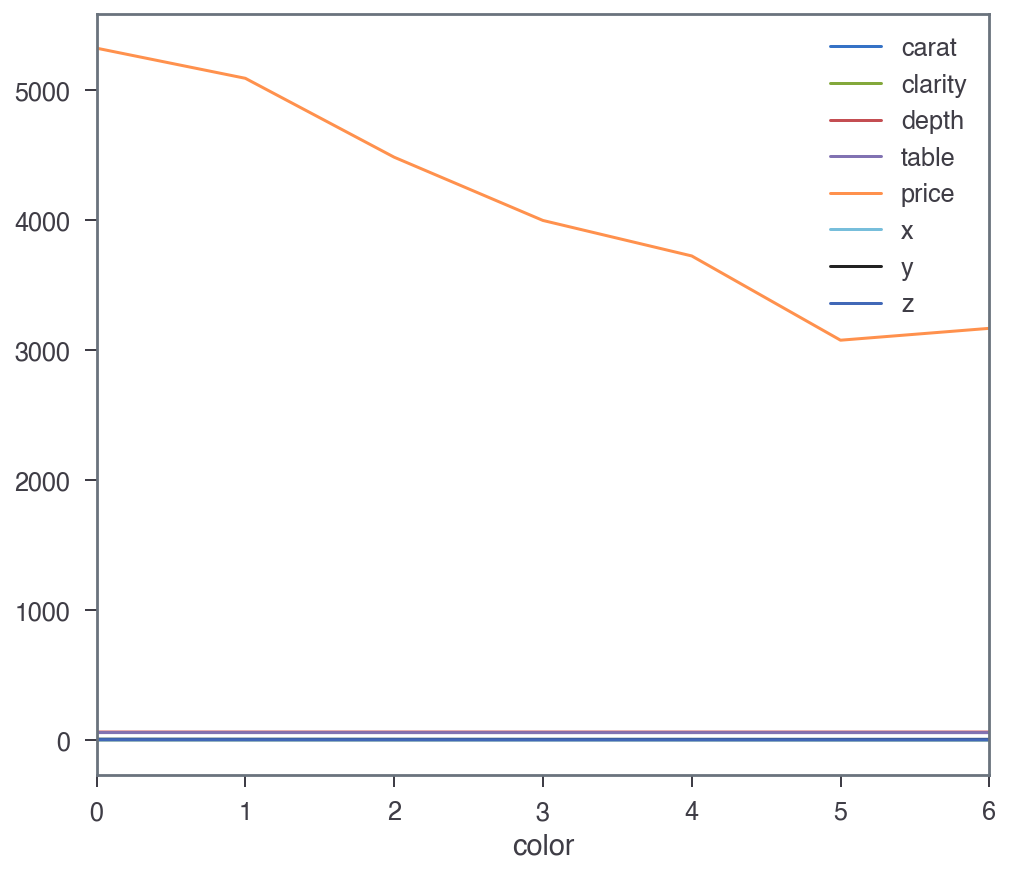

In [74]:
# FIRST PLOT
diamonds_color_grouped.plot();

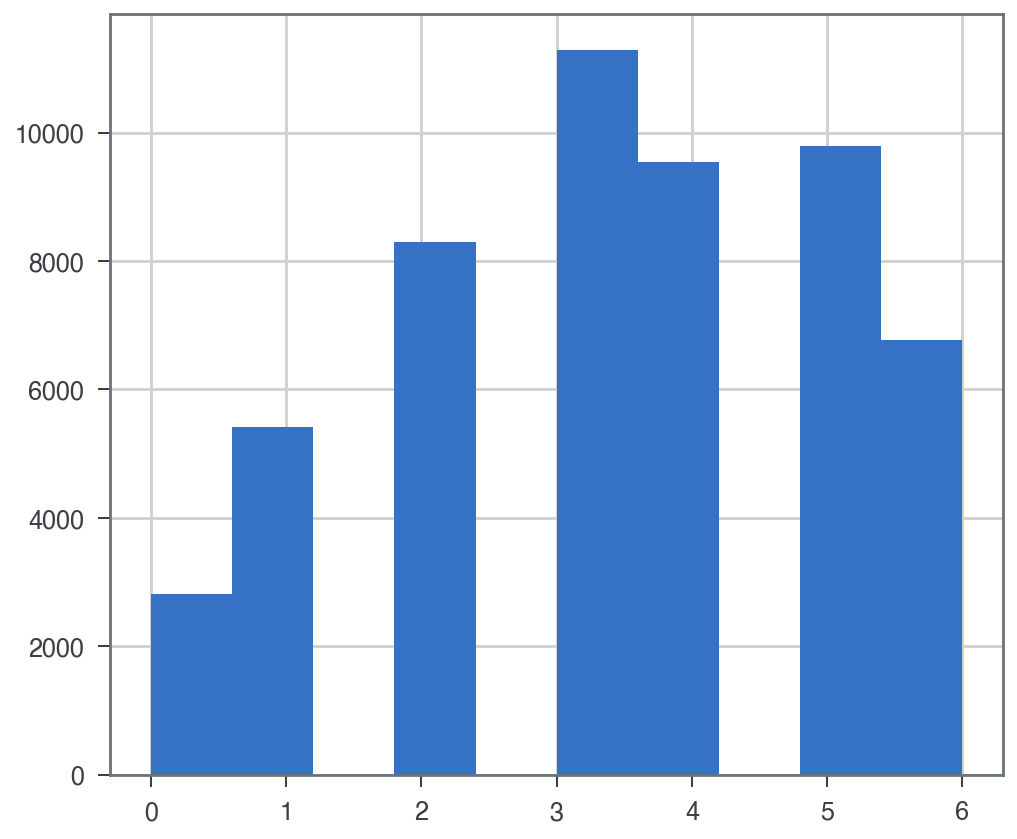

In [77]:
# SECOND PLOT
diamonds['color'].hist();

In [ ]:
# COMMENTS
'''
In the first plot we can see that there seems to be like a negative correlation with the price and
the diamonds' colors? That's very interesting, actually, and the rest of all the other variables
seem to just be left at the bottom of the graph, untouched and with no relation at all.

However, on the second graph, which now uses the full dataset and the color column, we can see just
the frequency, as you guys asked. And we can see how many diamonds we roughly have per diamond color.
Seems like they aren't that badly spread apart, actually, and the big majority is around 3-4, but
5-6 also has quite a bit of diamonds.
'''

## 2.The `carat` column 

Let's check the `carat` (weight), since this could also be a potential factor for price change.

**Find the mean of each column for each value of `carat` using the `groupby` method. Then comment your results.**

In [ ]:
#your code here

In [ ]:
#your comments


**Plot a histogram of the `carat` column by using the `plot` method (see the docs to find an easy way to do so). What is happening?**

In [ ]:
#your code here

# 3. The `table` and `clarity` column
Finally, let's check the `table`.

**Find the mean of each column for each value of `table` using the `groupby` method. Then comment your results.**

In [ ]:
#your code here

In [ ]:
#your comments here

**Finally, do the same with the `clarity` column.**

In [ ]:
#your code here

In [ ]:
#your comments here

**After looking at your results, which features do you think will affect price the most now? Regarding your hypotheses, do they match your final results? Provide a small overview.**

In [ ]:
#your thoughts here

# 4. Taking a deeper look with plots and correlations

To take deeper look, we will use the `pairplot` method of `seaborn` library. This method plots a scatterplot for each pair of features and in the diagonal the distribution of the feature.

So if you have many features it will take a while, be careful!


In [ ]:
#Run this code
import seaborn as sns
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

**What do you see here? What relationships between variables are the most interesting?**

In [ ]:
#your thoughts here

Now we will see a correlation matrix with a plot. As you know a higher correlation means that the feature could be an effect (**but is not for sure**) for the changes on the price.

We will see this with a matrix with colors. A lighter color means greater correlation. 

This is done with the `seaborn` library as well.

In [ ]:
# your code here

**What do you see here? Regarding the results before, does it fit with them?**

In [ ]:
#your thoughts here

Finally, we will calculate the linear regression between the price and the weight. This will be done first by plotting it with the `seaborn` library and then calculating the error with the `scipy` library.

In [ ]:
# your code here

**What do you think?**

In [ ]:
#your thoughts here

**Would you do any other checks on other features? Do you have any comments regarding `carat`?**

In [ ]:
#your thoughts here

**Conclusion**

**From our dataset** we can conclude that although `color` and `clarity` have a classification, and thus an assigned importance or weight, they do not influence the monetary value of a diamond in determining way. While it is true that different colors or clarities may have different prices, upon closer examination those variations in price seem to be linked to `carat` (weight) and its `dimensions`. In our analysis, the key factor to determining a diamond's value was placed solely in the aforementioned features, since we can see in our correlation coefficients and in the coefficient of determination that these features are closely related.